In [1]:
import keras

# Carga del conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist

In [2]:
# Carga de la división de entrenamiento y prueba del conjunto fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Label: 0
Image:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  

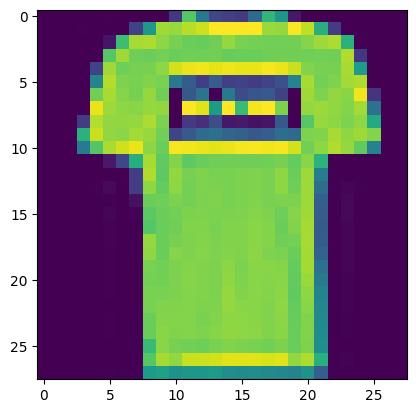

In [3]:
import numpy as np
import matplotlib.pyplot as plt

index = 1

# Impresión de la etiqueta e imagen
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')

# Visualización
plt.imshow(training_images[index])

In [4]:
# Normalización de valoers de pixeles del tren y pueba de imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

In [5]:
# Construcción del modelo de clasificación
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

In [6]:
# Compilación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Entrenamiento
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4967 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3729 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3348 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3110 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2925 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2789 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2670 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2557 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2469 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 

In [ ]:
# Gráfico del historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
# Evaluación del modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento", loss)
print("Precisión en el conjunto de entrenamiento", accuracy)

# Evaluación del modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de entrenamiento", loss)
print("Precisión en el conjunto de entrenamiento", accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2249 - accuracy: 0.9164
Pérdida en el conjunto de entrenamiento 0.2248503714799881
Precisión en el conjunto de entrenamiento 0.916366696357727
313/313 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8800
Pérdida en el conjunto de entrenamiento 0.34073594212532043
Precisión en el conjunto de entrenamiento 0.8799999952316284


In [10]:
# Predicción
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 121ms/step
Classification:
 [[4.3636386e-04]
 [8.1317629e-13]
 [9.9537128e-01]
 [2.8602597e-07]
 [2.8115122e-03]
 [1.8928447e-13]
 [1.3805404e-03]
 [1.1488420e-16]
 [2.9883607e-09]
 [2.7971549e-13]]
